# Test for Calculating Room Acoustic Parameter
- using module 'pyRoomAcoustic'


In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time

# Import Audio
import wave
import pyaudio
#import librosa

import numpy as np
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic
import pyOssDebug as dbg



In [2]:
# Path of audiofiles folder
audio_dir = os.path.join(os.getcwd(), 'audiofiles')

# Define wave file name text to open
# Path + wave file name

wav_fname = os.path.join(audio_dir, 'TyndallBruceMonument.wav')

#wav_fname = os.path.join(audio_dir, 'ElvedenHallMarbleHall.wav')
#wav_fname = os.path.join(audio_dir, 'EmptyApartmentBedroom.wav')
#wav_fname = os.path.join(audio_dir, 'FalklandPalaceRoyalTennisCourt.wav')
#wav_fname = os.path.join(audio_dir, 'InsidePiano.wav')
#wav_fname = os.path.join(audio_dir, 'MaesHowe.wav')
#wav_fname = os.path.join(audio_dir, 'SportsCentreUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StairwayUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StAndrewsChurch.wav')

ossWav_fmt_chunk=  (18, 3, 2, 44100, 352800, 8, 32) ,ossWav_length=  1693440
Audio Format = 3
Number of Channel = 2
Sampling Frequency = 44100
Byte Rate = 352800
Block Align = 8
Bits per Sample = 32
Time = 4.8 sec
Length =  211680


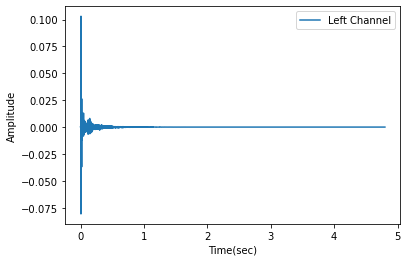

In [3]:
# Read .wav file using pyOssWavfile.read() & Extract .wav file header information

ossWav_fmt_chunk, ossWav_data, ossWav_length = pyOssWavfile.read(wav_fname)
ossWav_format, ossWav_numch, ossWav_fs, ossWav_byterate, ossWav_blockalign, ossWav_bitdepth = pyOssWavfile.extractWavFmtChunk(ossWav_fmt_chunk)
ossWav_time = ossWav_data.shape[0] / ossWav_fs

print("ossWav_fmt_chunk= ", ossWav_fmt_chunk, ",ossWav_length= ", ossWav_length)
print("Audio Format =", ossWav_format)
print("Number of Channel =", ossWav_numch)
print("Sampling Frequency =", ossWav_fs)
print("Byte Rate =", ossWav_byterate)       # 일종의 Checksum 
print("Block Align =", ossWav_blockalign)
print("Bits per Sample =", ossWav_bitdepth)
print("Time =", ossWav_time, "sec")
print("Length = ", ossWav_data.shape[0])

# Plot loaded wave file
dbg.plotAudio(ossWav_fs, ossWav_data[:,0], "Left Channel", "Time(sec)", "Amplitude")



 ossWav_decaycurve.shape =  (211680, 2)


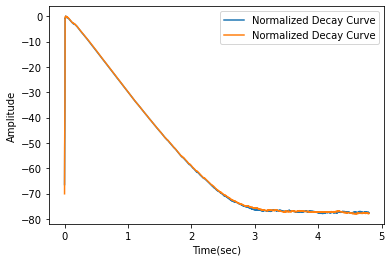

 decaycurve dim =  2
_reverbaration(): T= [[0.]
 [0.]]
_reverbaration(): nonLinearity= [[0.]
 [0.]]
_reverbaration(): x=  909 y=  0.0
_reverbaration(): reqDBStart= -5 , sample0dB= 9063
_reverbaration(): dim of sample0dB = 0
_reverbaration(): reqDBEnd= -65 ,  sample10dB= 99052
_reverbaration(): x=  910 y=  0.0
_reverbaration(): reqDBStart= -5 , sample0dB= 9183
_reverbaration(): dim of sample0dB = 0
_reverbaration(): reqDBEnd= -65 ,  sample10dB= 99454
 ossWav_rt60= [[1.974]
 [1.978]]


In [4]:
import pyRoomAcoustic


#ossWav_decaycurve = pyRoomAcoustic.decayCurve(ossWav_data[:,0], ossWav_time, ossWav_fs)
ossWav_decaycurve = pyRoomAcoustic.decayCurve(ossWav_data, ossWav_time, ossWav_fs)

#dbg.dPrint("", "ossWav_decaycurve.shape = ", ossWav_decaycurve.shape)

np.zeros((2,1))

# Plot Normalized Decay Curve
dbg.plotAudio(ossWav_fs, ossWav_decaycurve, "Normalized Decay Curve", "Time(sec)", "Amplitude")

#dbg.dPrint("", "decaycurve dim = ", ossWav_decaycurve.ndim)      # for Debug

ossWav_rt60, ossWav_nonLin = pyRoomAcoustic.T60(ossWav_decaycurve, ossWav_fs) 

dbg.dPrint("", "ossWav_rt60=", ossWav_rt60)         # for Debug
